In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn.tree import export_graphviz
import numpy as np
from IPython.display import Image
import seaborn as sns


## 1. PREPARING DATASETS

### 1.1. Load datasets

In [2]:
data = pd.read_csv("car_data.csv")
print(data)
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
feature = data[data.columns[0:4]]
label = data["Purchased"]
features_name = feature.columns.to_numpy()
target_names = ["0","1"]
target_names_mapping = {
    "1": "Buy",
    "0": "No buy"
}

     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


/tmp/ipykernel_33487/3426779910.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})


### 1.2. Explore data

In [3]:
data.shape

(1000, 5)

## 2. SPLIT DATASETS

In [4]:
proportions = [0.6, 0.4, 0.2, 0.1]

# Tạo từ điển để lưu các tập dữ liệu sau khi chia
datasets = {}

for pro in proportions:
    # Chia dữ liệu thành tập train và test
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, test_size=pro, random_state=42
    )
    
    # Lưu kết quả vào từ điển với tên tương ứng
    datasets[f"feature_train_{1-pro}"] = feature_train
    datasets[f"feature_test_{pro}"] = feature_test
    datasets[f"label_train_{1-pro}"] = label_train
    datasets[f"label_test_{pro}"] = label_test


### Visualization

In [5]:
def visualize_distribution(label, name, ax=None): 
    counter = Counter(label)
    classes, counts = zip(*sorted(counter.items()))
    
    if ax is None: 
        plt.bar(classes, counts, color='skyblue', edgecolor='black', width=0.2,align="center")
        for i, count in enumerate(counts):
            plt.text(classes[i], count + 5, str(count), ha='center', va='bottom', fontsize=10, color='black')
        plt.xticks(classes)
        plt.xlabel('Value')
        plt.ylabel('Distribution')
        plt.title(name)
        plt.show()
    else:  
        ax.bar(classes, counts, color='skyblue', edgecolor='black', width=0.2)
        for i, count in enumerate(counts):
            ax.text(classes[i], count + 5, str(count), ha='center', va='bottom', fontsize=10, color='black')
        ax.set_xticks(classes)
        ax.set_xlabel('Value')
        ax.set_ylabel('Distribution')
        ax.set_title(name)


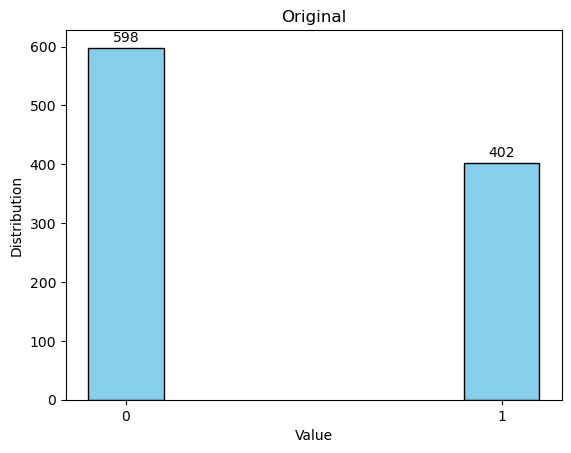

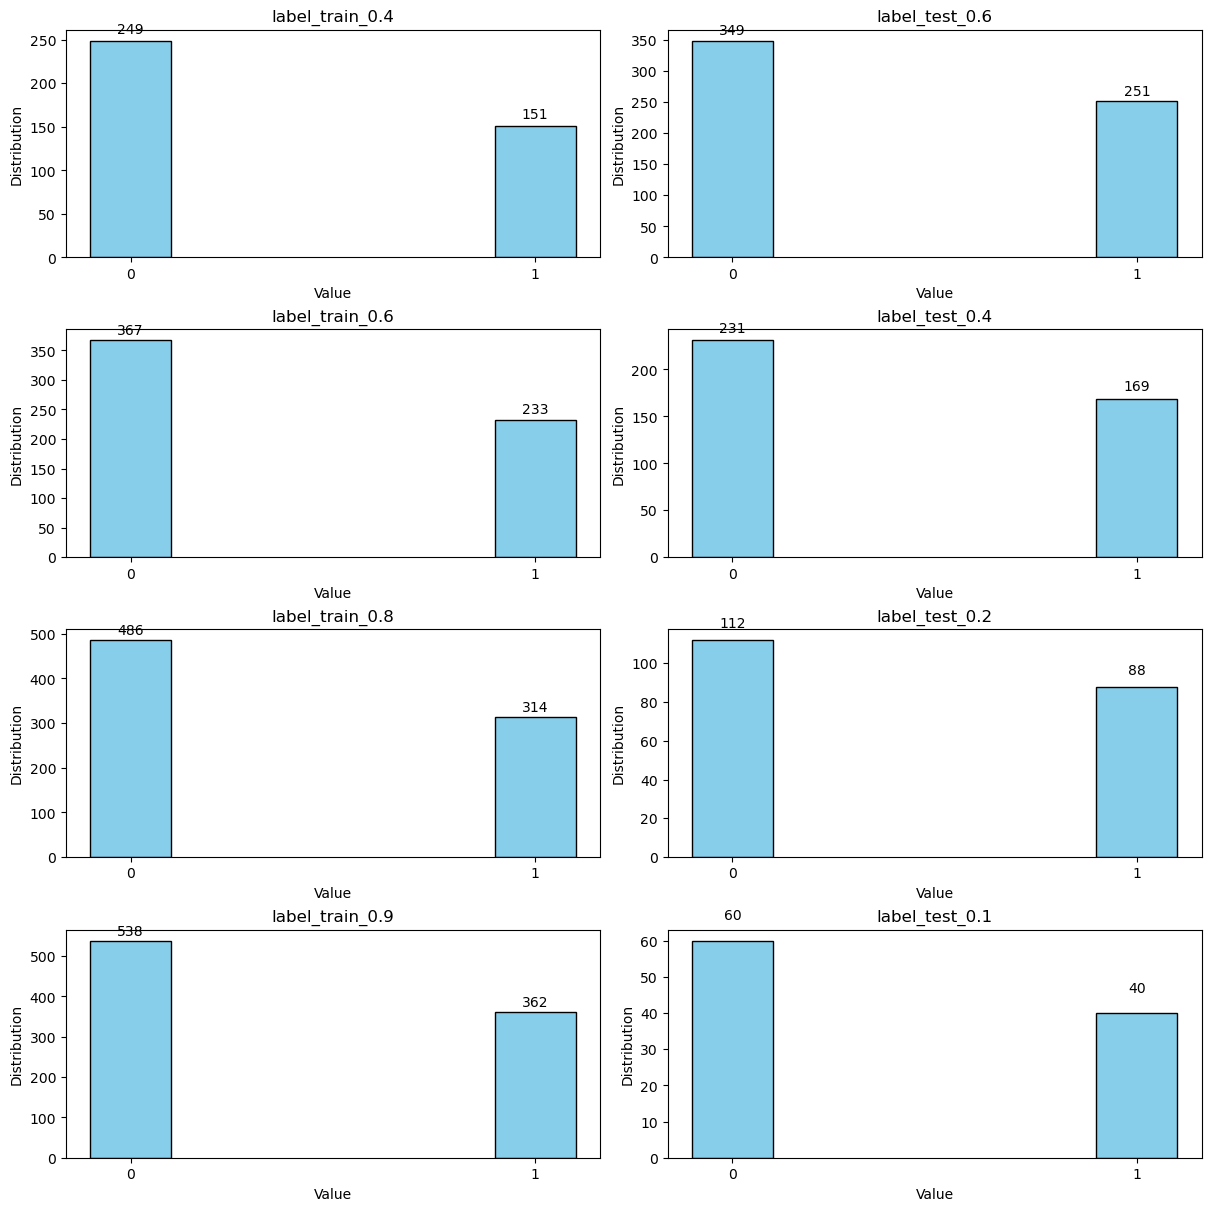

In [6]:
visualize_distribution(label, "Original")

filtered_keys = [key for key in datasets if "label" in key]
num_keys = len(filtered_keys)

fig, axes = plt.subplots(nrows=(num_keys + 1) // 2, ncols=2, figsize=(12, 12), constrained_layout=True)
axes = axes.flatten() 

for i, key in enumerate(filtered_keys):
    visualize_distribution(datasets[key], key, ax=axes[i])

# Ẩn các ô trống nếu số biểu đồ lẻ
for j in range(len(filtered_keys), len(axes)):
    axes[j].axis('off')

plt.show()

## 3. BUIDING THE DECISION TREE CLASSIFIERS

In [7]:
save_folder = "./Image4Datasets/"

### 3.1 40/60-TRAIN/TEST DATASET

#### a) Create decision tree

In [8]:
X_train_40 = datasets['feature_train_0.4']
X_test_60 = datasets['feature_test_0.6']
Y_train_40 = datasets['label_train_0.4']
Y_test_60 = datasets['label_test_0.6']

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train_40,Y_train_40)
y_predict_60 = tree_clf.predict(X_test_60)


#### b) Visualize

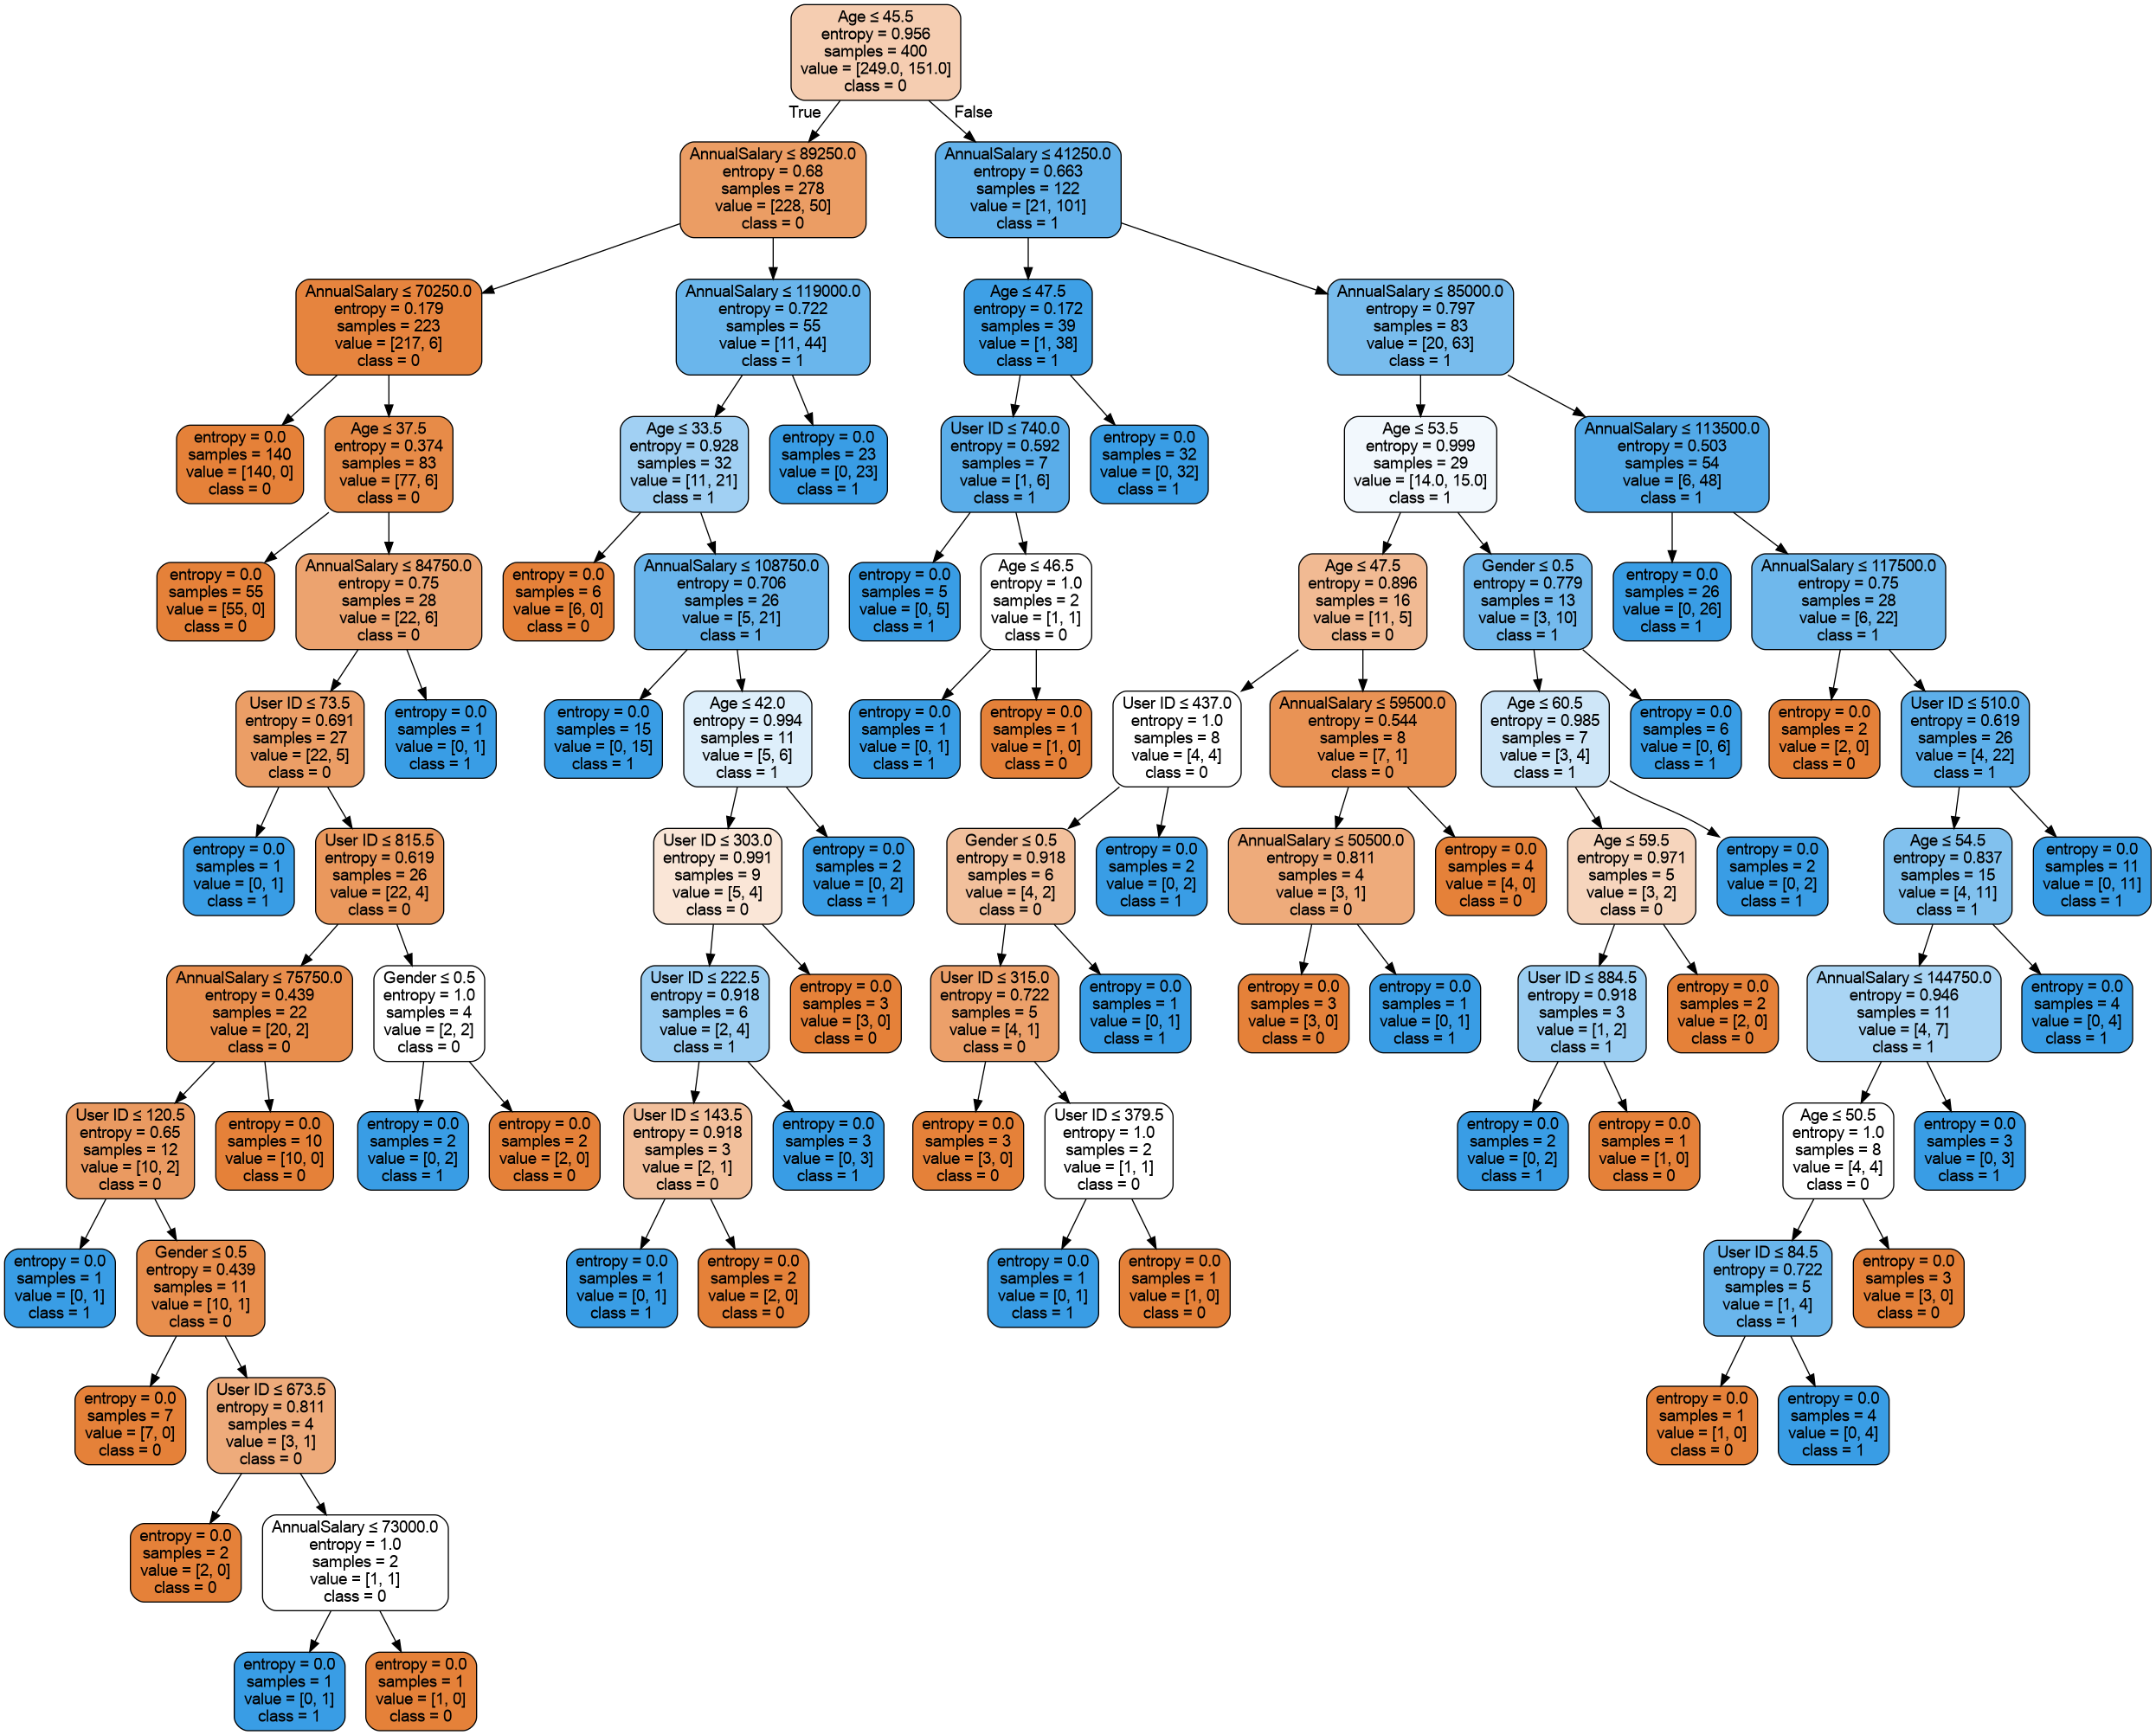

In [9]:
split_46 = export_graphviz(
    tree_clf, 
    out_file=None, 
    feature_names=features_name,  
    class_names=["0","1"],
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(split_46)
graph.render(save_folder+ "data_40_60", format="png", cleanup=True)
display(Image(save_folder+"data_40_60.png"))

#### c) Evaluate the decision tree classifiers

In [10]:
report_60_test = classification_report(y_predict_60, Y_test_60, target_names=target_names)
print("\nClassification Report:")
print(report_60_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       367
           1       0.81      0.87      0.84       233

    accuracy                           0.87       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.87      0.87      0.87       600



- Confusion matrix:

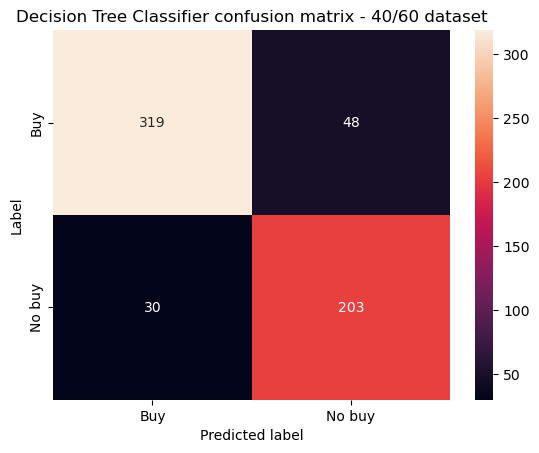

In [11]:
cf_60_test = confusion_matrix(y_predict_60, Y_test_60)

sns.heatmap(
    cf_60_test, 
    annot=True, 
    fmt = 'd', 
    xticklabels=target_names_mapping.values(), 
    yticklabels=target_names_mapping.values()
    )
plt.xlabel('Predicted label')
plt.ylabel('Label')
plt.title("Decision Tree Classifier confusion matrix - 40/60 dataset");

### 3.2 60/40-TRAIN/TEST DATASET

#### a) Create decision tree

In [12]:
X_train_60 = datasets['feature_train_0.6']
X_test_40 = datasets['feature_test_0.4']
Y_train_60 = datasets['label_train_0.6']
Y_test_40 = datasets['label_test_0.4']

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train_60,Y_train_60)
y_predict_40 = tree_clf.predict(X_test_40)

#### b) Visualize

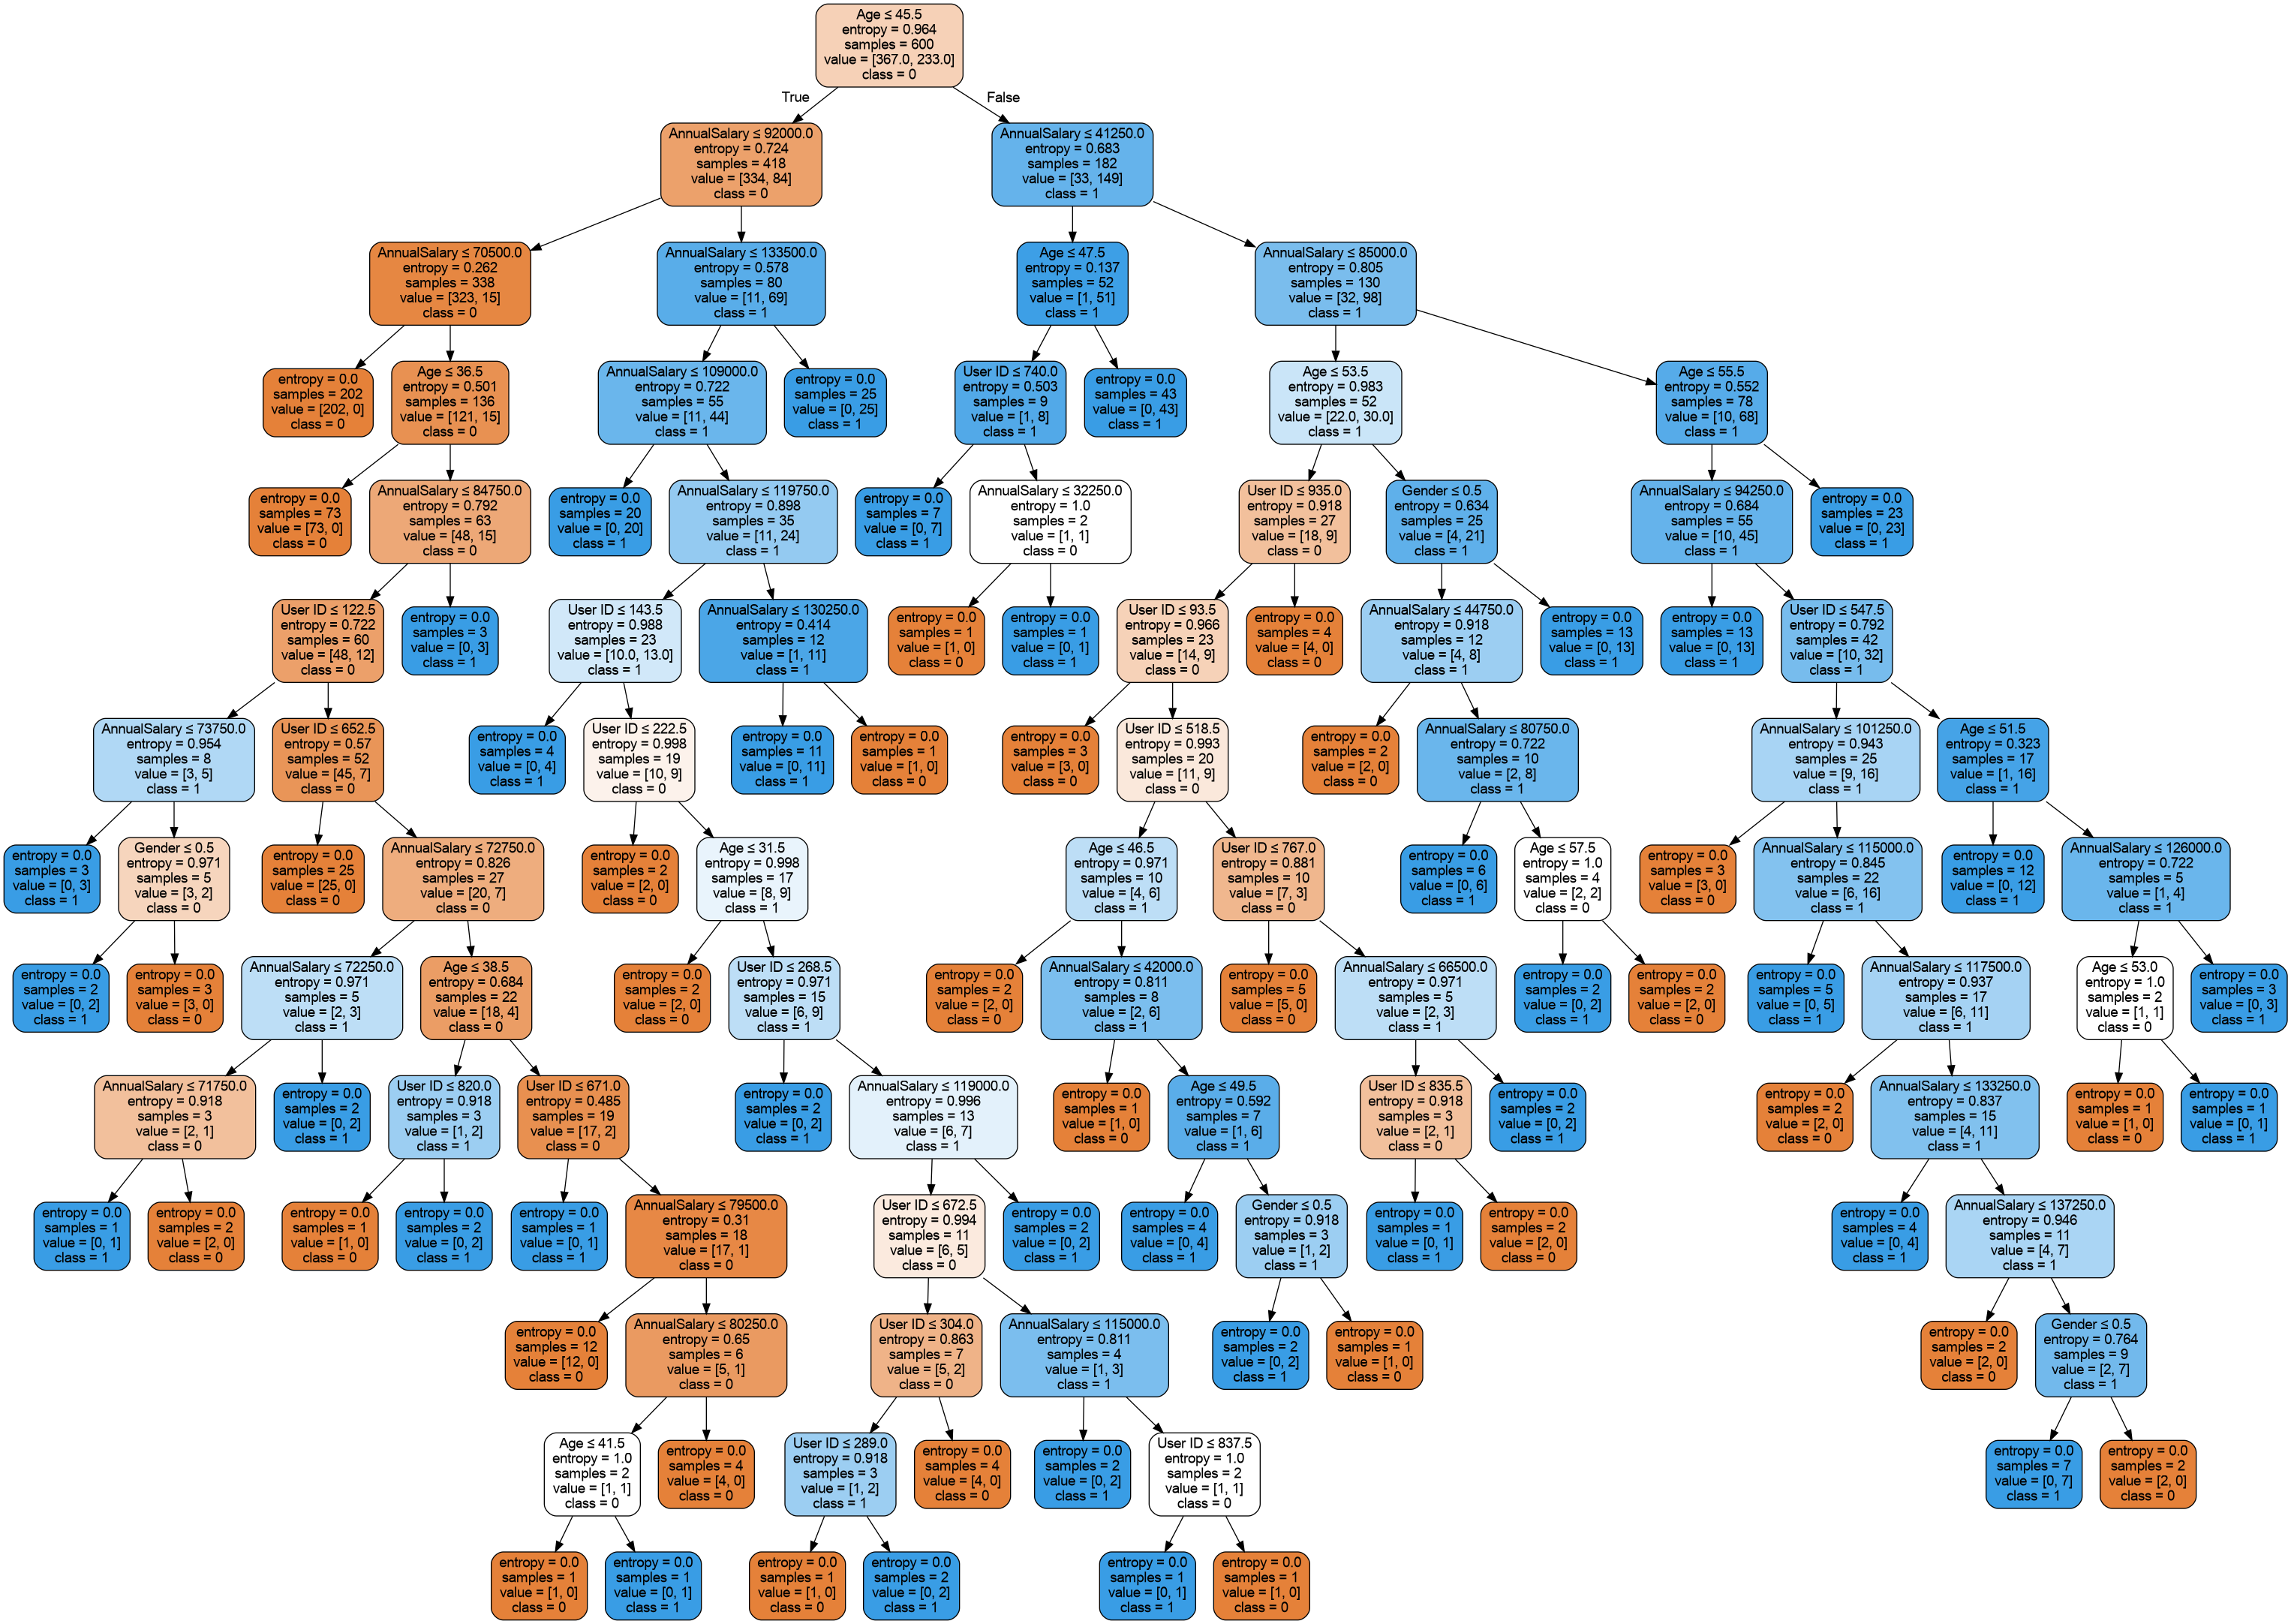

In [13]:

split_64 = export_graphviz(
    tree_clf, 
    out_file=None, 
    feature_names=features_name,  
    class_names=["0","1"],
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(split_64)
graph.render(save_folder+ "data_60_40", format="png", cleanup=True)
display(Image(save_folder+"data_60_40.png"))

#### c) Evaluate the decision tree classifiers

In [14]:
report_40_test = classification_report(y_predict_40, Y_test_40, target_names=target_names)
print("\nClassification Report:")
print(report_40_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       243
           1       0.82      0.89      0.85       157

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



- Confusion matrix:

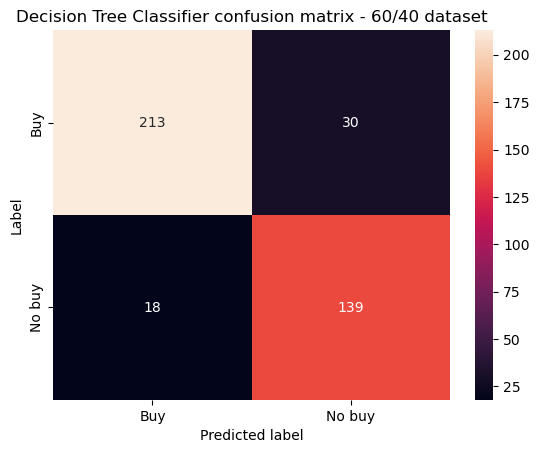

In [15]:
cf_40_test = confusion_matrix(y_predict_40, Y_test_40)

sns.heatmap(
    cf_40_test, 
    annot=True, 
    fmt = 'd', 
    xticklabels=target_names_mapping.values(), 
    yticklabels=target_names_mapping.values()
    )
plt.xlabel('Predicted label')
plt.ylabel('Label')
plt.title("Decision Tree Classifier confusion matrix - 60/40 dataset");

### 3.3 80/20-TRAIN/TEST DATASET

#### a) Create decision tree

In [16]:
X_train_80 = datasets['feature_train_0.8']
X_test_20 = datasets['feature_test_0.2']
Y_train_80 = datasets['label_train_0.8']
Y_test_20 = datasets['label_test_0.2']

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train_80,Y_train_80)
y_predict_20 = tree_clf.predict(X_test_20)


#### b) Visualize

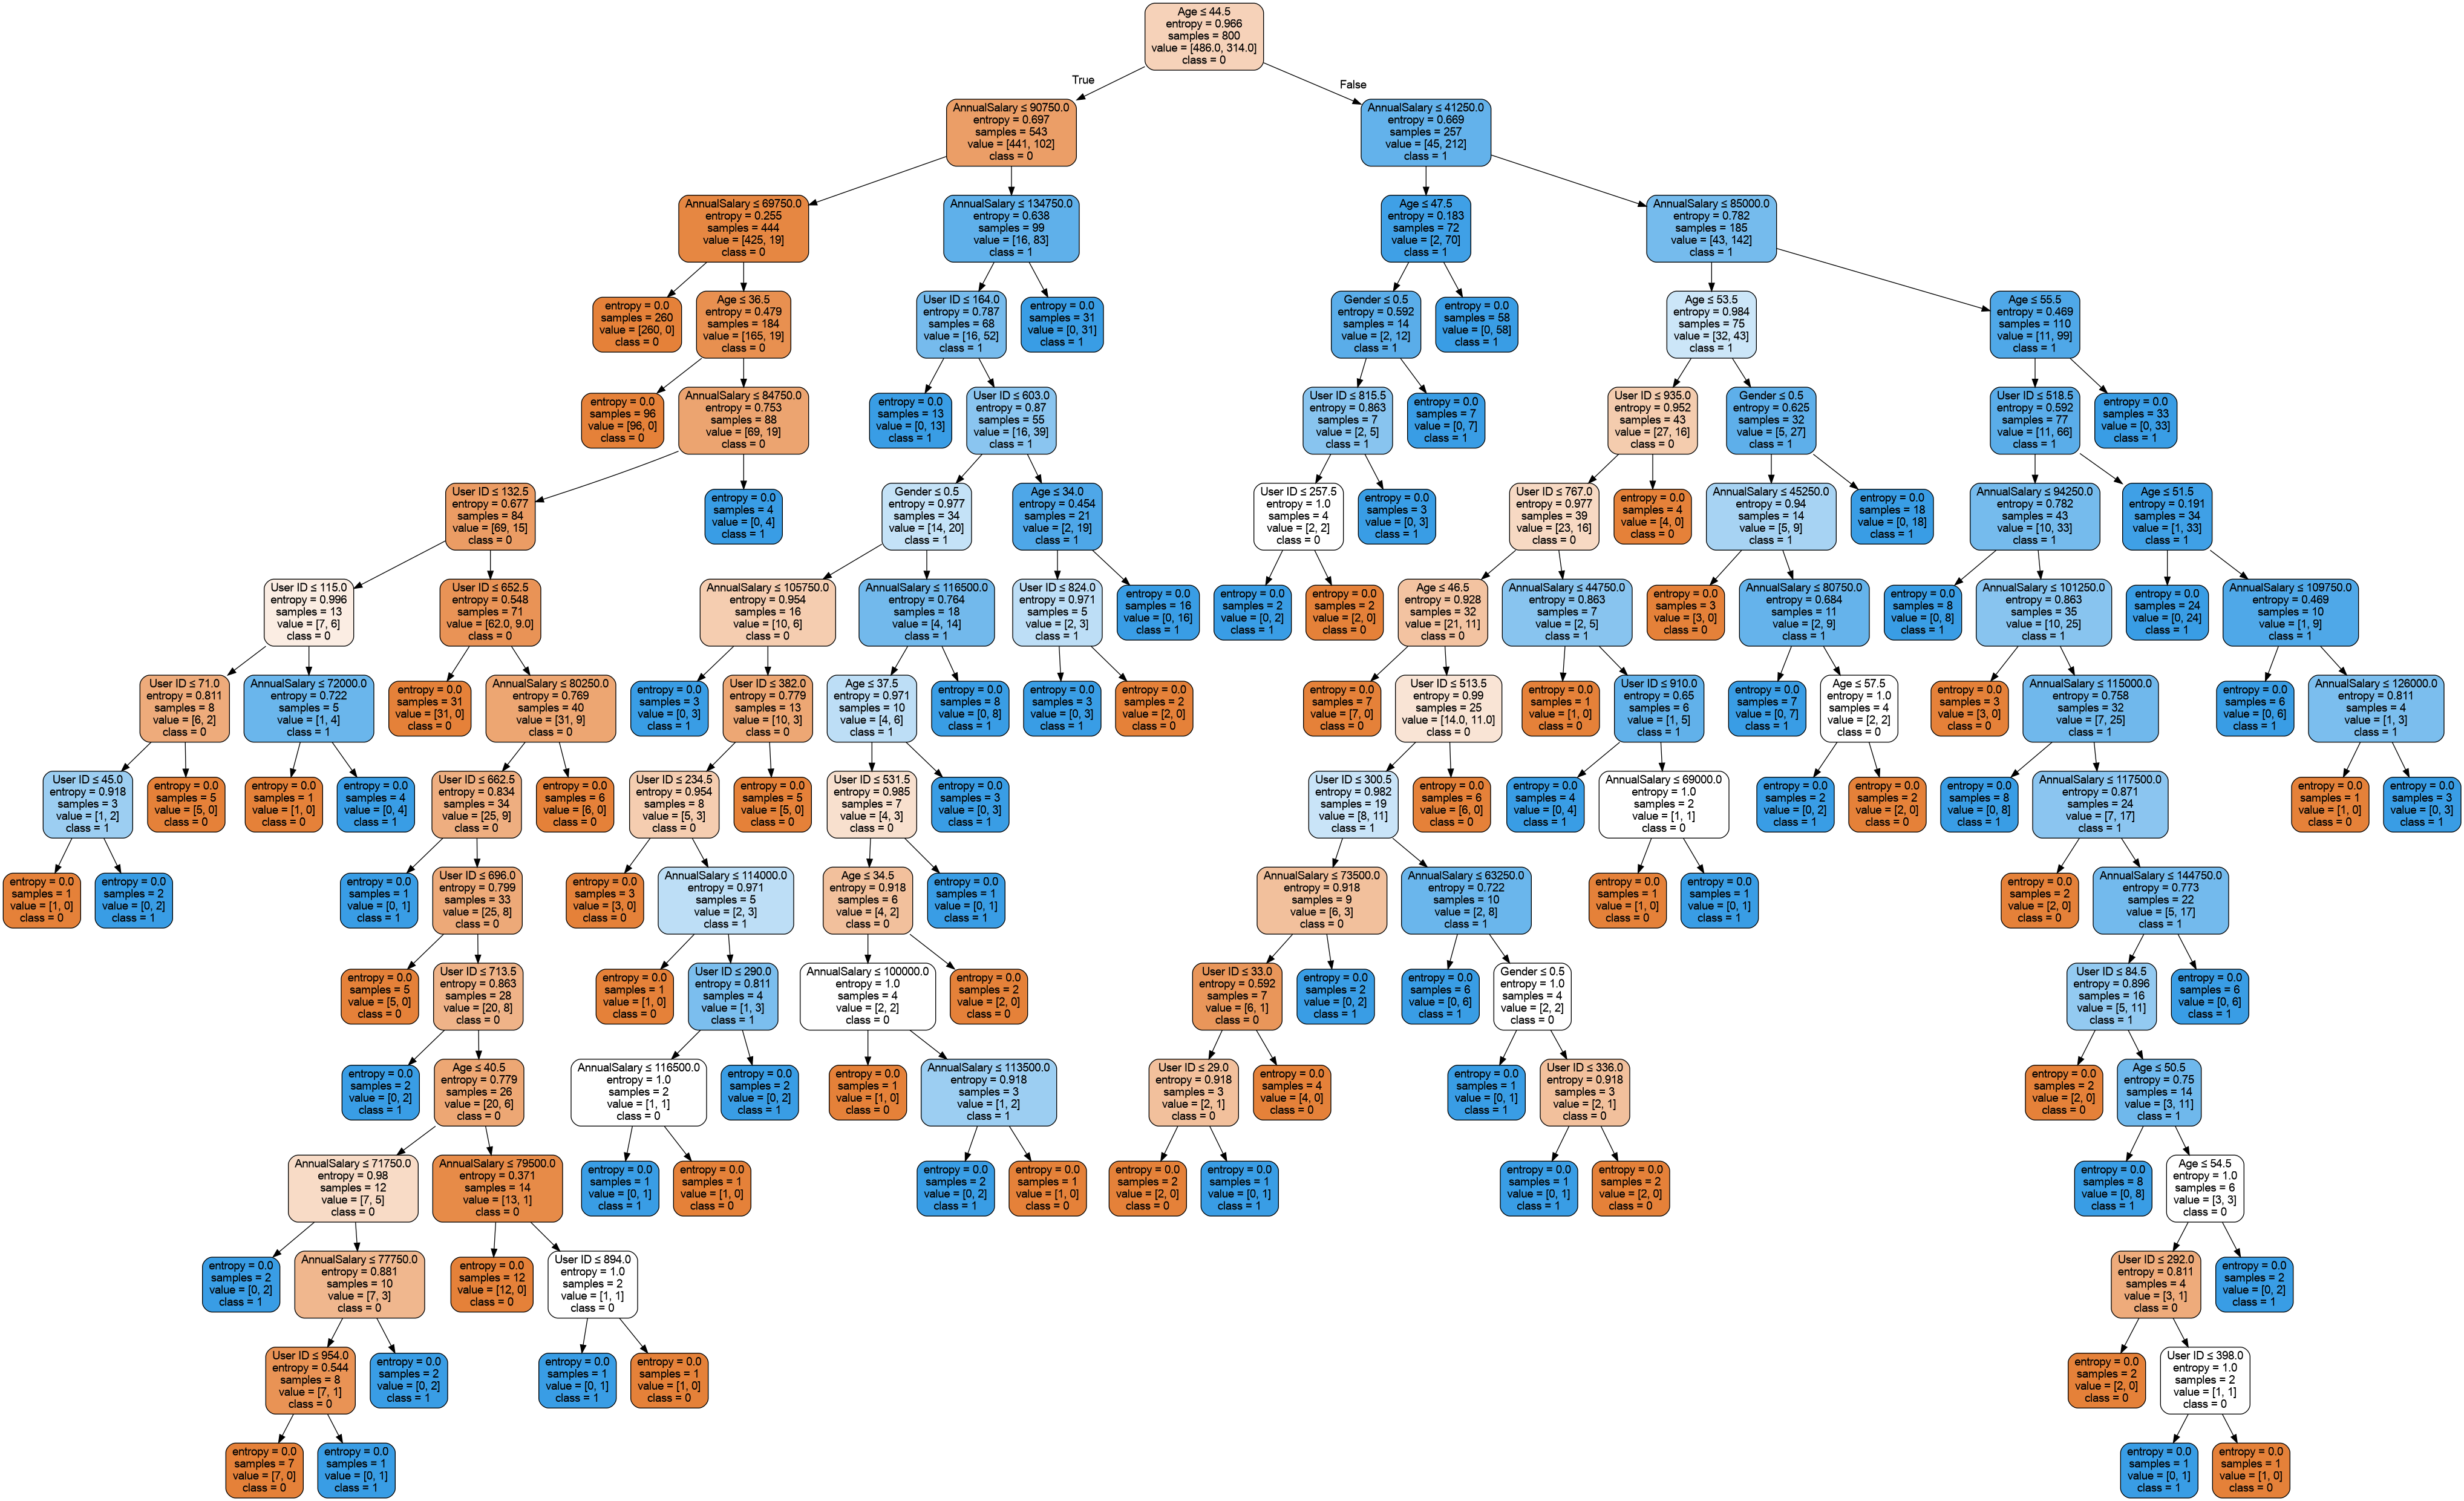

In [17]:
split_82 = export_graphviz(
    tree_clf, 
    out_file=None, 
    feature_names=features_name,  
    class_names=["0","1"],
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(split_82)
graph.render(save_folder+ "data_80_20", format="png", cleanup=True)
display(Image(save_folder+"data_80_20.png"))

#### c) Evaluate the decision tree classifiers

- Classification report

In [18]:
report_20_test = classification_report(y_predict_20, Y_test_20, target_names=target_names)
print("\nClassification Report:")
print(report_20_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       116
           1       0.84      0.88      0.86        84

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



- Confusion matrix:

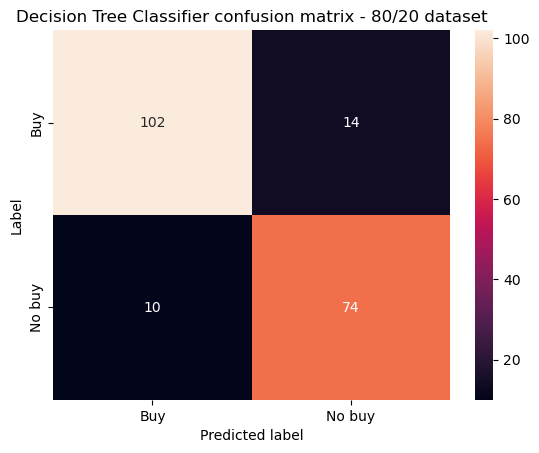

In [19]:
cf_20_test = confusion_matrix(y_predict_20, Y_test_20)

sns.heatmap(
    cf_20_test, 
    annot=True, 
    fmt = 'd', 
    xticklabels=target_names_mapping.values(), 
    yticklabels=target_names_mapping.values()
    )
plt.xlabel('Predicted label')
plt.ylabel('Label')
plt.title("Decision Tree Classifier confusion matrix - 80/20 dataset");

### 3.4 90/10-TRAIN/TEST DATASET

#### a) Create decision tree

In [20]:
X_train_90 = datasets['feature_train_0.9']
X_test_10 = datasets['feature_test_0.1']
Y_train_90 = datasets['label_train_0.9']
Y_test_10 = datasets['label_test_0.1']

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train_80,Y_train_80)
y_predict_10 = tree_clf.predict(X_test_10)


#### b) Visualize

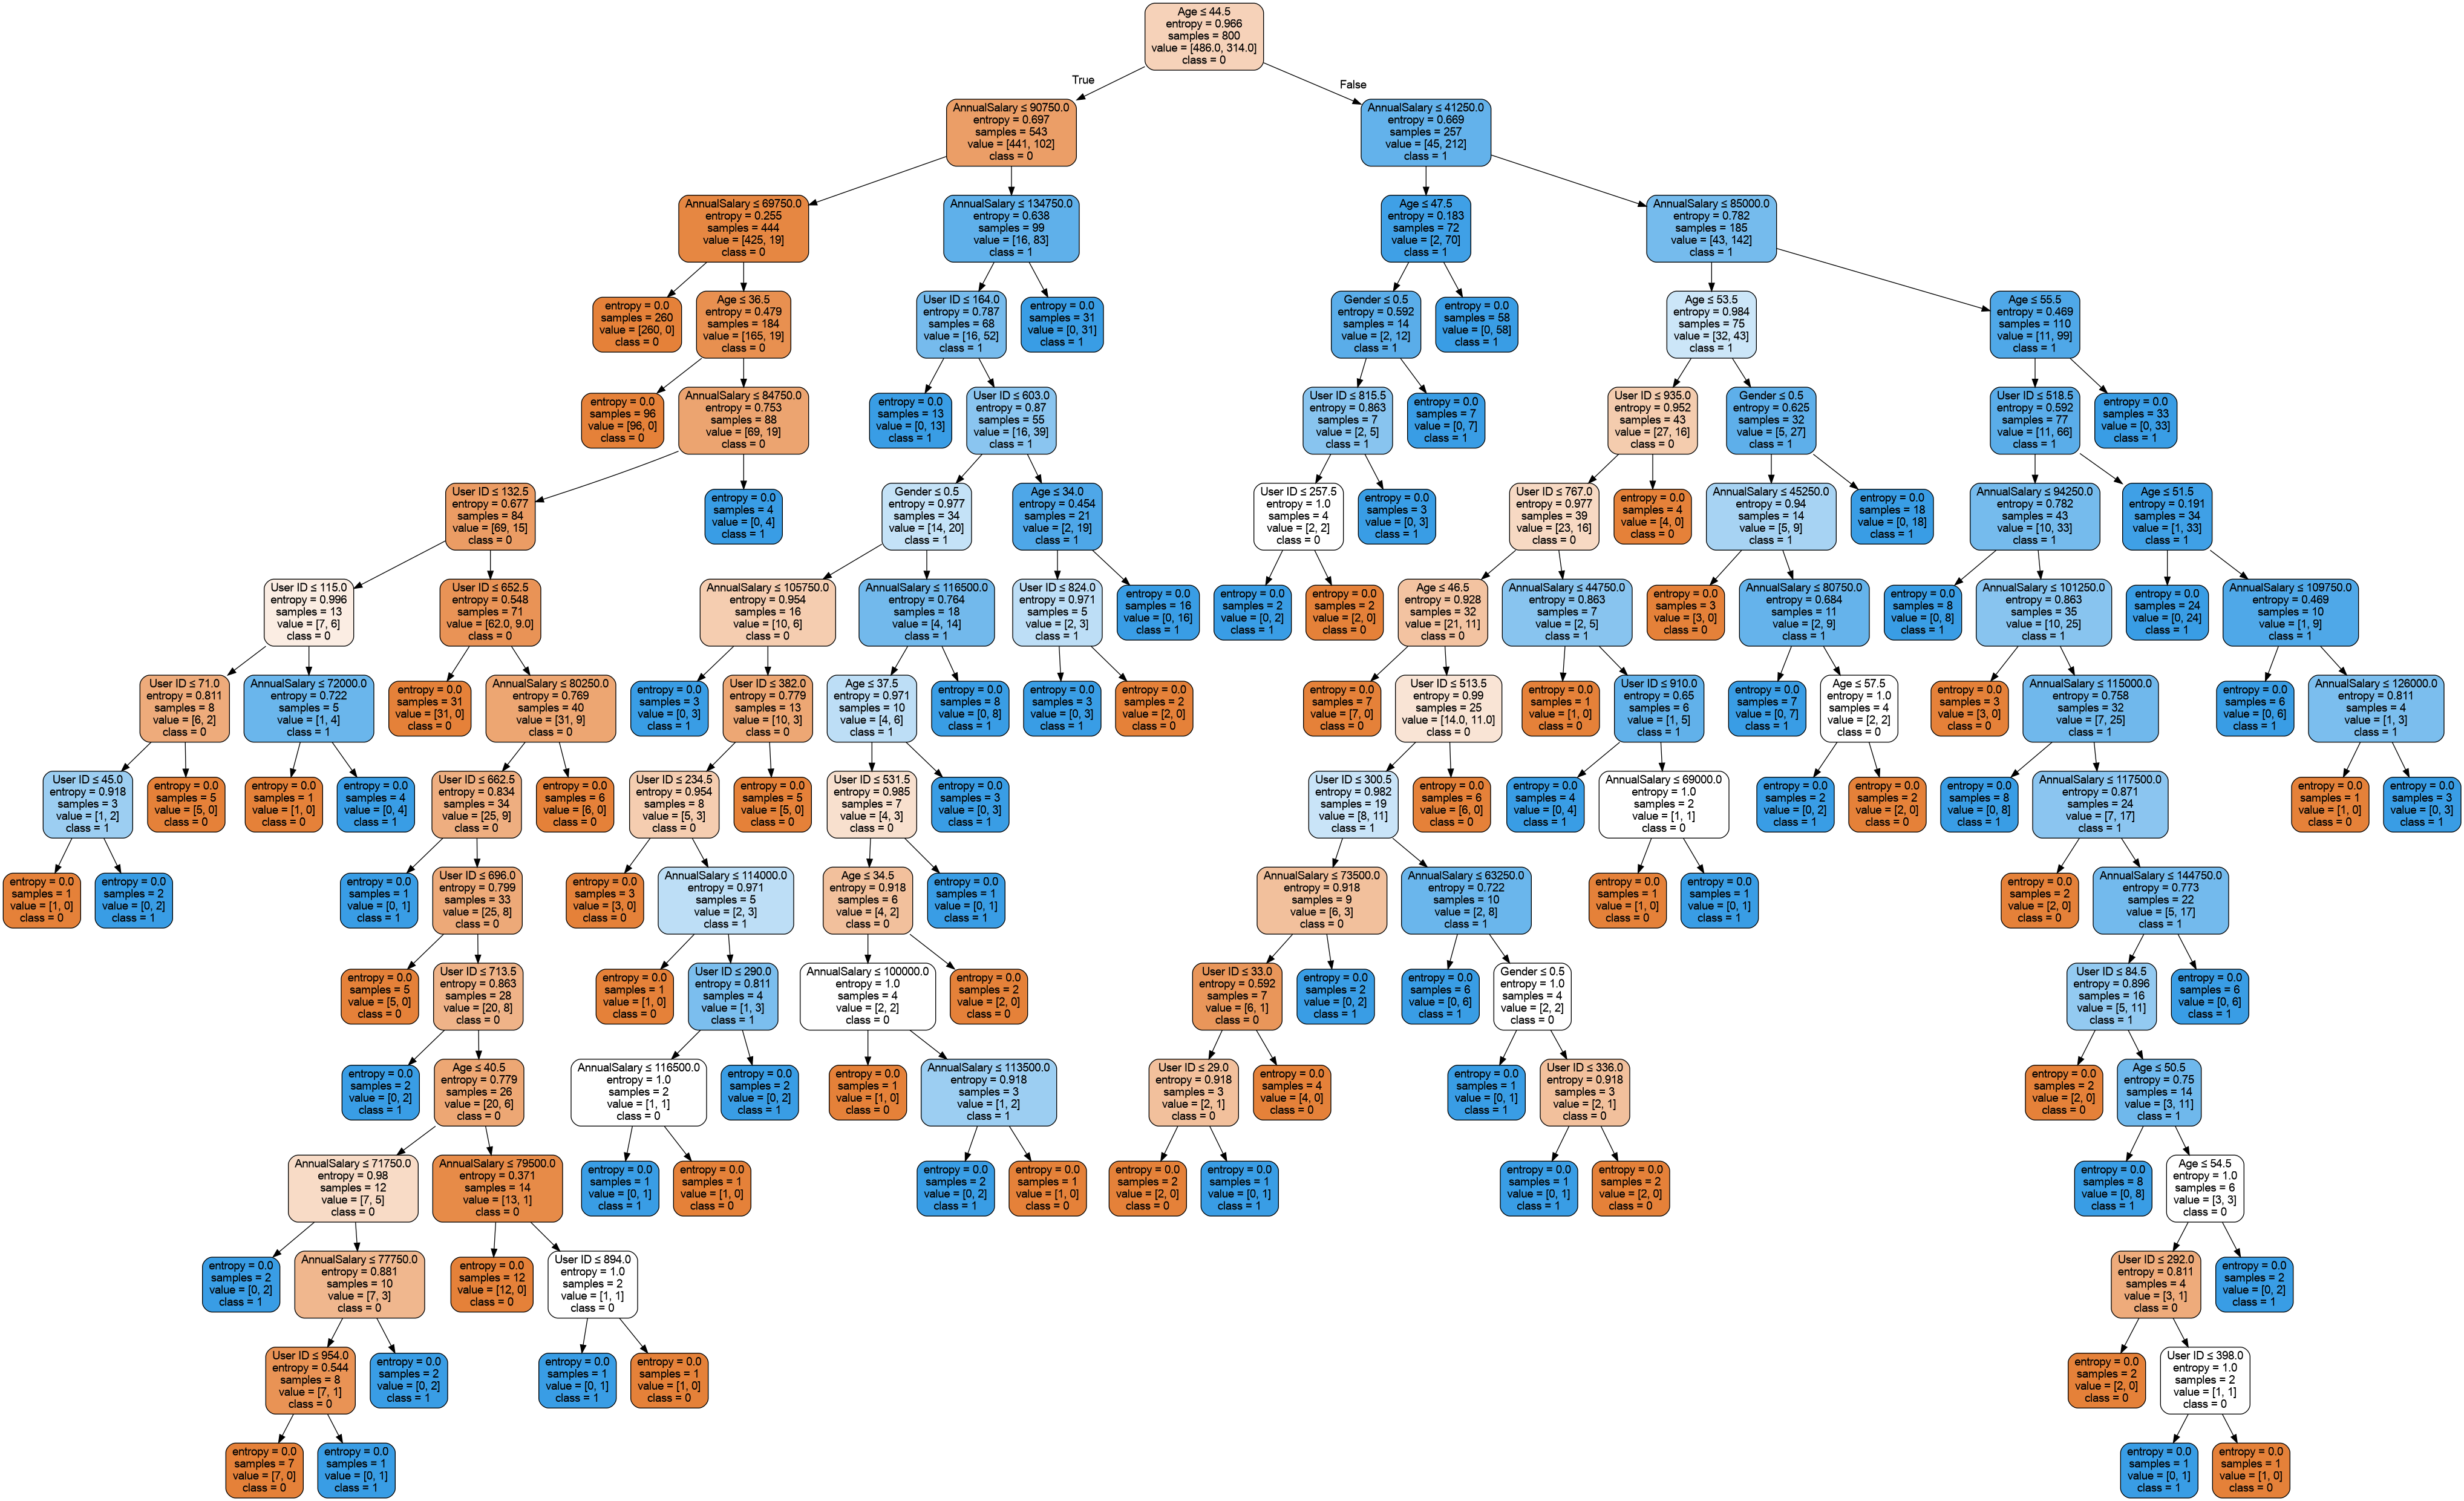

In [21]:
split_91 = export_graphviz(
    tree_clf, 
    out_file=None, 
    feature_names=features_name,  
    class_names=["0","1"],
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(split_91)
graph.render(save_folder+ "data_90_10", format="png", cleanup=True)
display(Image(save_folder+"data_90_10.png"))

#### c) Evaluate the decision tree classifiers

- Classification report

In [22]:
report_10_test = classification_report(y_predict_10, Y_test_10, target_names=target_names)
print("\nClassification Report:")
print(report_10_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.85      0.81      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.86      0.86      0.86       100



- Confusion matrix:

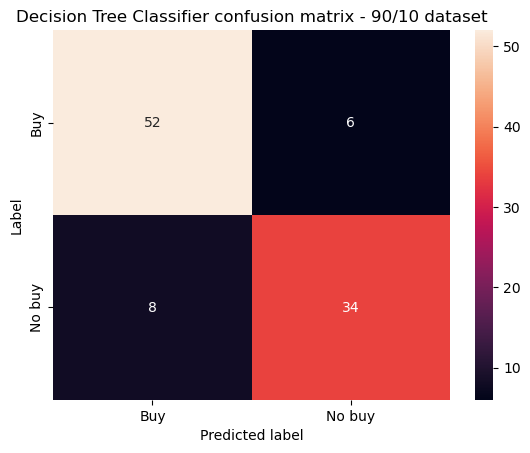

In [23]:
cf_10_test = confusion_matrix(y_predict_10, Y_test_10)

sns.heatmap(
    cf_10_test, 
    annot=True, 
    fmt = 'd', 
    xticklabels=target_names_mapping.values(), 
    yticklabels=target_names_mapping.values()
    )
plt.xlabel('Predicted label')
plt.ylabel('Label')
plt.title("Decision Tree Classifier confusion matrix - 90/10 dataset");

### 3.5 VISUALIZE THE CHANGE IN 4 TRAIN/TEST RATIOS

#### a) Create data from classification reports

In [24]:
precision_B = [0.81, 0.82, 0.84, 0.85]
precision_N = [0.91, 0.92, 0.91, 0.87]

recall_B = [0.87, 0.89, 0.88, 0.81]
recall_N = [0.87, 0.88, 0.88, 0.90]

accuracies = [0.87, 0.88, 0.88, 0.86]
f1_scores_weighted = [0.87, 0.88, 0.88, 0.86]

labels = ['40/60', '60/40', '80/20', '90/10']

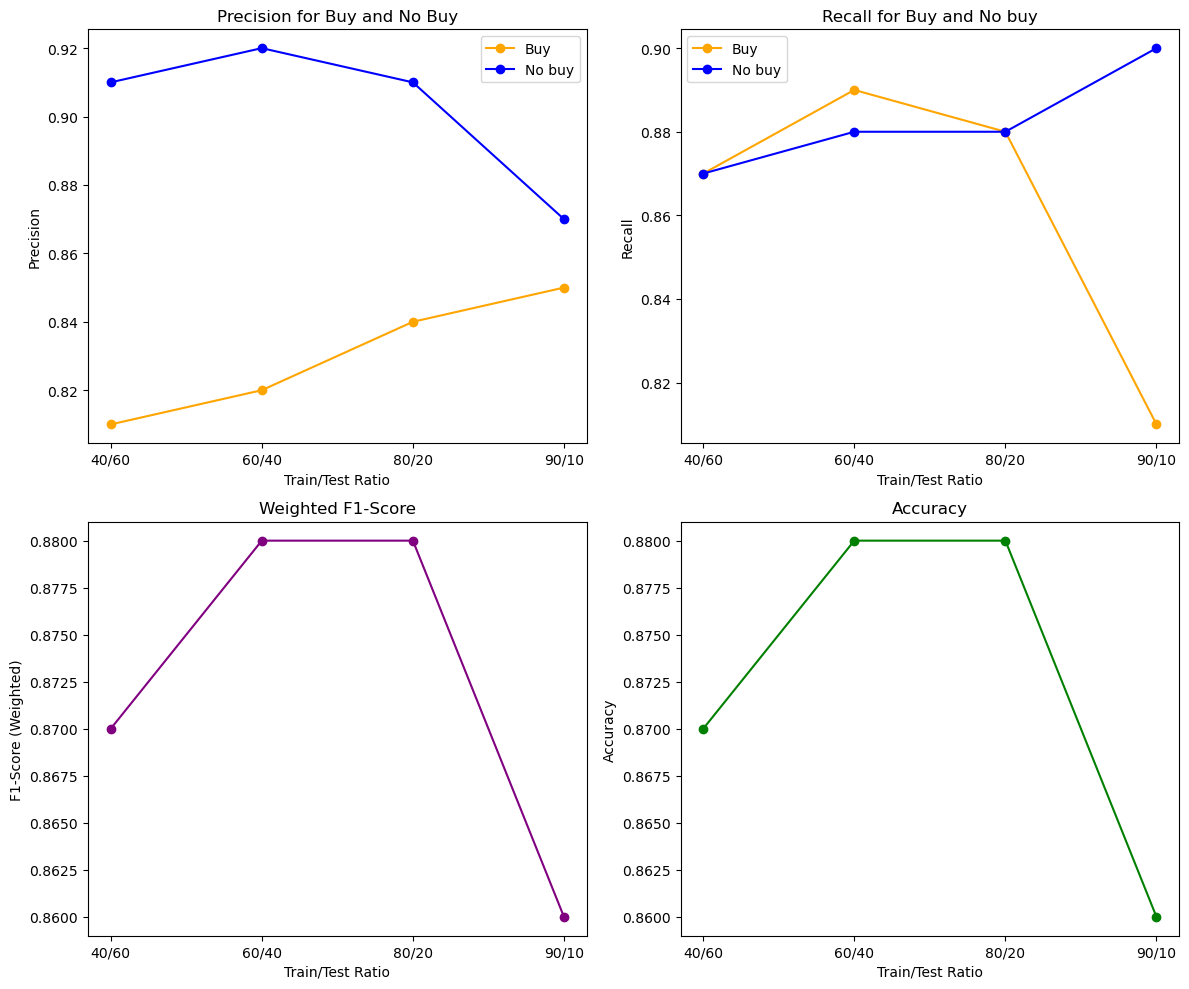

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Precision
axes[0, 0].plot(labels, precision_B, label='Buy', marker='o', color='orange')
axes[0, 0].plot(labels, precision_N, label='No buy', marker='o', color='blue')
axes[0, 0].set_title('Precision for Buy and No Buy')
axes[0, 0].set_xlabel('Train/Test Ratio')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Recall
axes[0, 1].plot(labels, recall_B, label='Buy', marker='o', color='orange')
axes[0, 1].plot(labels, recall_N, label='No buy', marker='o', color='blue')
axes[0, 1].set_title('Recall for Buy and No buy')
axes[0, 1].set_xlabel('Train/Test Ratio')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# F1-Score (Weighted)
axes[1, 0].plot(labels, f1_scores_weighted, label='Weighted F1-Score', marker='o', color='purple')
axes[1, 0].set_title('Weighted F1-Score')
axes[1, 0].set_xlabel('Train/Test Ratio')
axes[1, 0].set_ylabel('F1-Score (Weighted)')

# Accuracy
axes[1, 1].plot(labels, accuracies, label='Accuracy', marker='o', color='green')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_xlabel('Train/Test Ratio')
axes[1, 1].set_ylabel('Accuracy')

plt.tight_layout();

## 4. DEPTH & ACCURACY OF 80/20-TRAIN/TEST DECISION TREE

### a) Create and Visualize the tree for each max_depth

In [26]:
max_depths = [None, 2,3,4,5,6,7]
accuracy = []

for depth in max_depths:
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    tree_clf.fit(X_train_80, Y_train_80)

    y_pred_20 = tree_clf.predict(X_test_20)
    score = accuracy_score(Y_test_20, y_pred_20)
    accuracy.append({'max_depth': str(depth), 'Accuracy': score})

    file_name = f"./Image7Depths/DT_{str(depth)}"
    dot_graph = export_graphviz(
        tree_clf, 
        out_file=None, 
        feature_names=features_name, 
        class_names=["0","1"],
        filled=True, 
        rounded=True, 
        special_characters=True
    )

    graph = graphviz.Source(dot_graph)
    graph.render(filename=file_name, format="png", cleanup=True)

### b) Plot the change in accuracy

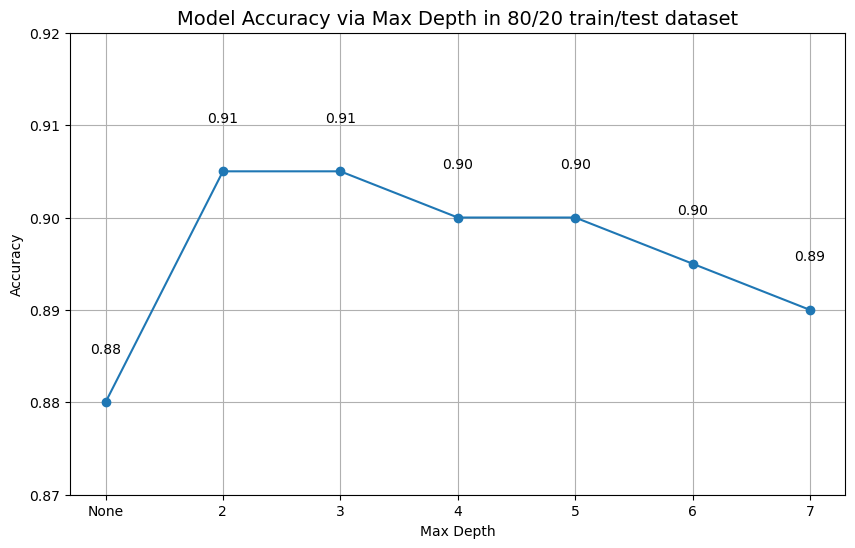

In [27]:
accuracy_df = pd.DataFrame(accuracy)

plt.figure(figsize=(10, 6))  
plt.plot(accuracy_df['max_depth'], accuracy_df['Accuracy'], marker='o')  
plt.title('Model Accuracy via Max Depth in 80/20 train/test dataset', fontsize=14)  
plt.xlabel('Max Depth')  
plt.ylabel('Accuracy')    
plt.ylim([0.87, 0.92])  
for i, acc in zip(accuracy_df['Accuracy'].index, accuracy_df['Accuracy']):  
    plt.text(accuracy_df['max_depth'][i], acc + 0.005, f"{acc:.2f}", ha='center', va='bottom')
plt.grid(True);